In [1]:
import pytest
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators,aux_operators
import timeit
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import auxiliars as aux

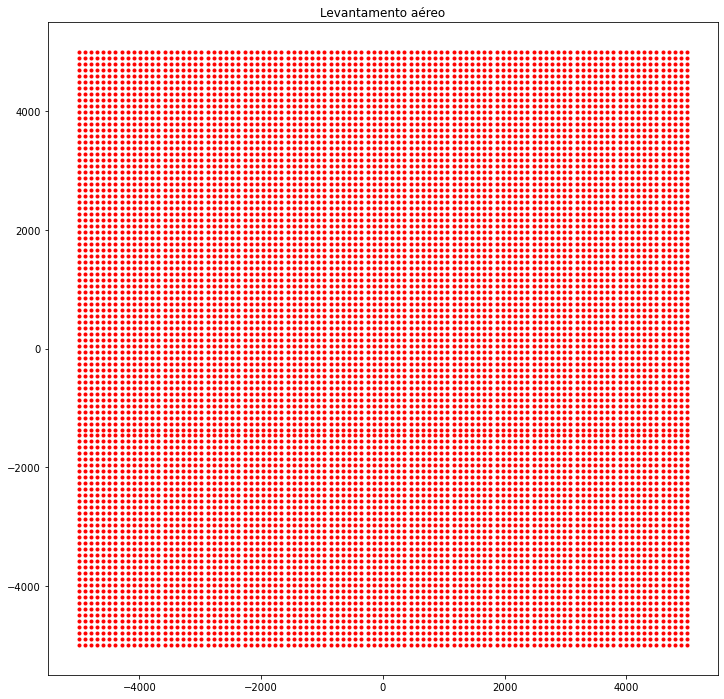

In [2]:
acquisition = {'nx': 100,
                  'ny': 100,
                  'xmin': -5000,
                  'xmax': 5000,
                  'ymin': -5000,
                  'ymax': 5000,
                  'z': -100.0,
                  'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

data_cubo = pd.read_table('Logfile/20_09_2020_11_26/data_mag.cvs', sep =',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (100,100))

## Create Population

In [3]:
population = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 1400.0,
                'z_min': 600.0,
                'n_dip': 10,
                'n_pop': 20,
                'inclmax': -40.0,
                'inclmin': -20.0,
                'declmax': -20.0,
                'declmin': 0.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }
I, D = -30.0, -23.0

filhos_mut = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 1500.0,
                'z_min': 500.0,
                'n': 1,
                'inclmax': -40.0,
                'inclmin': -20.0,
                'declmax': -20.0,
                'declmin': 0.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }


In [15]:
def create_population_array(xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, n_pop, homogeneo):
    """
    Função com o objetivo de criar uma população com n indivíduos randômicos, que estaram de acordo com os parâmetros
    escolhidos.

    :param xmax: O valor máximo da coordenada X.
    :param ymax: O valor máximo da coordenada Y.
    :param zlim: O valor máximo da coordenada Z.
    :param xmin: O valor minímo da coordenada X.
    :param ymin: O valor minímo da coordenada Y.
    :param z_min: O valor minímo da coordenada Z.
    :param n_pop: O número de indivíduos desejados na população.
    :param n_dip: O número de dipolos desejados para cada indivíduo.
    :param inclmax: Valor máximo da inclianção magnética.
    :param inclmin: Valor mínimo da inclianção magnética.
    :param declmax: Valor máximo da inclianção magnética.
    :param declmin: Valor mínimo da declianção magnética.
    :param magmax: Valor máximo da magnetização.
    :param magmin: Valor mínimo da magnetização.
    :param homogeneo: True para valores de inclinação, declinação e magnetização iguais para as n dipolos.
                      False é a opção default, onde os valores de inclinação, declinação e magnetização é criada de
                      forma randômica.

    :return pop: Lista com n indivíduos/dipolos criados de forma randômica.
    """
    if n_pop >= 10:
        pop = []
        n_par = 3
        for j in range(n_pop):
            cood = np.zeros((n_dip+1, n_par))
            coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n_dip)
            incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, 1, homogeneo)
            for i in range(n_dip):
                cood[i][0], cood[i][1], cood[i][2] = coodX[i], coodY[i], coodZ[i]
            cood[n_dip][0], cood[n_dip][1], cood[n_dip][2] = incl[0], decl[0], mag[0] 
            pop.append(cood)    
        return pop
    else:
        return print('Por favor. Coloque o número de indivíduos maior ou igual a 10')


In [16]:
pop = create_population_array(**population)

In [17]:
print(pop)

[array([[-2.72005301e+03,  1.31857403e+03,  9.22221760e+02],
       [-1.97176037e+03,  4.35945107e+03,  9.85775425e+02],
       [-5.40945770e+01, -3.75269380e+02,  1.20561592e+03],
       [ 4.98510911e+03, -1.48421334e+02,  1.33645316e+03],
       [ 8.01417577e+02, -1.03070982e+03,  1.25073009e+03],
       [-3.68354917e+03,  6.27380292e+02,  1.00729128e+03],
       [-3.44930891e+03,  4.46475195e+03,  1.29349664e+03],
       [-6.00291701e+02,  2.07646502e+03,  1.39223862e+03],
       [ 4.20168868e+03, -1.35798591e+03,  6.77091984e+02],
       [ 4.82076521e+03, -3.65642732e+03,  1.29053871e+03],
       [-2.21258526e+01, -1.23800429e+01,  8.77953418e-01]]), array([[-4.21891493e+03, -1.54206505e+03,  9.29712244e+02],
       [ 1.53460238e+03, -4.45383426e+03,  8.44906454e+02],
       [ 4.79539366e+03, -3.07525226e+03,  9.27994143e+02],
       [ 1.89877385e+03, -2.26132459e+03,  1.23093330e+03],
       [ 6.10289486e+02,  4.29386576e+03,  7.51457572e+02],
       [-1.64645096e+03,  8.88292872e

In [18]:
print(len(pop[0]))
incl = pop[0][len(pop[0])-1, 0]
x_ = pop[0][0, 0]
print(incl)
print(x_)

11
-22.12585259696899
-2720.053011603262


In [19]:
%timeit create_population_array(**population)

9.19 ms ± 621 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Fit

In [20]:
def sphere_all(x, y, z, sphere, radius, mag, incs, decs):

    '''    
    It is a Python implementation for a Fortran subroutine contained in Blakely (1995). It 
    computes the Z component of the magnetic induction caused by a sphere with uniform  
    distribution of magnetization. The direction X represents the north and Z represents 
    growth downward. This function receives the coordinates of the points of observation 
    (X, Y, Z - arrays), the coordinates of the center of the sphere (Xe, Ye, Ze), the
    magnetization intensity M and the values for inclination and declination (in degrees). 
    The observation values are given in meters.
    
    Inputs: 
    x, y, z - numpy arrays - position of the observation points
    sphere[0, 1, 2] - arrays - position of the center of the sphere
    sphere[3] - float - value for the spehre radius  
    sphere[4] - flaot - magnetization intensity value
    direction - numpy array - inclination and declination values
    
    Outputs:
    Bz - induced field on Z direction
     
    Ps. The value for Z can be a scalar in the case of one depth, otherwise it can be a 
    set of points.
    '''
    
    # Stablishing some conditions
    if x.shape != y.shape:
        raise ValueError("All inputs must have same shape!")
    
    # Calculates some constants
    t2nt = 1.e9 # Testa to nT - conversion
    cm = 1.e-7  # Magnetization constant
    
    #Setting some constants
    xe, ye, ze = sphere[0], sphere[1], sphere[2]
    #radius = sphere[3]
    
    # Distances in all axis directions - x, y e z
    rx = x - xe
    ry = y - ye
    rz = z - ze
    
    # Computes the distance (r) as the module of the other three components
    r2 = rx**2 + ry**2 + rz**2
    
    # Computes the magnetization values for all directions
    mx, my, mz = aux.dircos(incs, decs)
    
    # Auxiliars calculations
    dot = (rx*mx) + (ry*my) + (rz*mz)  # Scalar product
    m = (4.*np.pi*(radius**3)*mag)/3.    # Magnetic moment
    
    # Final component calculation
    bx = m*(3.*dot*rx - (r2*mx))/(r2**(2.5))
    by = m*(3.*dot*ry - (r2*my))/(r2**(2.5))
    bz = m*(3.*dot*rz - (r2*mz))/(r2**(2.5))
    
    # Final component calculation
    bx *= cm*t2nt
    by *= cm*t2nt
    bz *= cm*t2nt
    
    # Return the final output
    return bx, by, bz




def sphere_tfa(x, y, z, sphere, radius, mag, incf, decf, incs = None, decs = None):

    '''    
    This function computes the total field anomaly produced due to a solid sphere, which has 
    its center located in xe, ye and ze, radius equals to r and also the magnetic property 
    (magnetic intensity). This function receives the coordinates of the points of observation 
    (X, Y, Z - arrays), the elements of the sphere, the values for inclination, declination 
    and azimuth (in one array only!) and the elements of the field (intensity, inclination, 
    declination and azimuth - IN THAT ORDER!). The observation values are given in meters.
    
    Inputs: 
    x, y, z - numpy arrays - position of the observation points
    sphere[0, 1, 2] - arrays - position of the center of the sphere
    sphere[3] - float - value for the spehre radius  
    sphere[4] - flaot - magnetization intensity value
    direction - numpy array - inclination and declination values
    field - numpy array - inclination and declination values for the field
    
    Outputs:
    tf_aprox - numpy array - approximated total field anomaly
    
    Ps. The value for Z can be a scalar in the case of one depth, otherwise it can be a 
    set of points.    
    '''
    
    # Stablishing some conditions
    if x.shape != y.shape:
        raise ValueError("All inputs must have same shape!")
    
    # Compute de regional field    
    fx, fy, fz = aux.dircos(incf, decf)
    
    if incs == None:
        incs = incf
    if decs == None:
        decs = decf
    
    # Computing the components and the regional field
    bx, by, bz = sphere_all(x, y, z, sphere, radius, mag, incs, decs)
    
    # Final value for the total field anomaly
    tf_aprox = fx*bx + fy*by + fz*bz
    
    # Return the final output
    return tf_aprox


In [21]:
def tfa_n_dips(incl, decl, mag, n, Xref, Yref, Zref, I, D, spheres):
    """
    Função com o objetivo calcular a anomalia magnética de n bolinhas.

    As entradas da função é feita da forma clássica ou através de um dicionário que é descompactado.
    O dicinário deve conter as chaves nomeadas de forma identica aos parâmetros de entrada da função.
    Exemplo de entrada: tfa_n_dots(**dicionario).

    :param dicionario: incl - Lista com os valores de inclinação magnética.
                       decl - Lista com os valores de declinação magnética.
                       mag - Lista com os valores de magnetização.
                       n - número de bolinhas desejadas.
                       Xref - Matrix com as coordenadas em X.
                       Yref - Matrix com as coordenadas em Y.
                       Zref - Matrix com as coordenadas em Z.
                       I - valor de inclinação regional.
                       D - valor de declinação regional.
                       spheres - Lista com os valores de coordenadas e raio de cada dipolo.
                           spheres[0] - Coordenada no eixo X.
                           spheres[1] - Coordenada no eixo Y.
                           spheres[2] - Coordenada no eixo Z.
                           spheres[3] - Raio do dipolo.
    :return: Uma matrix com os valores de anomália magnética para cada ponto do local estudado.
    """

    # ---------------------------------------------------------------------------------------------------------------------#
    tfa_n = 0
    raio = 100.0
    for i in range(n):
        tfa_cada = sphere_tfa(Xref, Yref, Zref, spheres[i], raio, mag, I, D, incl, decl)
        tfa_n += tfa_cada

    return tfa_n

In [22]:
def caculation_anomaly(X, Y, Z, I, D, pop):
    raio = 100.0
    anomaly = []
    #n_dip = len(pop[0])-1

    for i in range(len(pop)):
        incl = pop[i][len(pop[0])-1, 0]
        decl = pop[i][len(pop[0])-1, 1]
        mag = pop[i][len(pop[0])-1, 2]
        spheres = pop[i][0:len(pop[0])-1, :]
        anomaly.append(tfa_n_dips(incl, decl, mag, len(pop[0])-1, X, Y, Z, I, D, spheres))
    return anomaly

In [23]:
raio2 = 100.0
sphere12 = pop[1][:, :]
#sphere12.append(raio2)
print(sphere12)
print(sphere12[0])

[[-4.21891493e+03 -1.54206505e+03  9.29712244e+02]
 [ 1.53460238e+03 -4.45383426e+03  8.44906454e+02]
 [ 4.79539366e+03 -3.07525226e+03  9.27994143e+02]
 [ 1.89877385e+03 -2.26132459e+03  1.23093330e+03]
 [ 6.10289486e+02  4.29386576e+03  7.51457572e+02]
 [-1.64645096e+03  8.88292872e+02  9.33482753e+02]
 [ 3.17908194e+03 -4.42369561e+03  7.11484773e+02]
 [ 3.79269127e+03 -4.70155406e+03  1.20267511e+03]
 [ 3.69581485e+03  1.14649637e+03  6.87838176e+02]
 [-4.52760382e+03 -4.66907412e+03  9.44696134e+02]
 [-3.67970548e+01 -1.01268221e+01  4.51302063e+00]]
[-4218.91493217 -1542.06505277   929.71224434]


In [24]:
%timeit caculation_anomaly(X, Y, Z, I, D, pop)

1.34 s ± 89.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
spheres1 = []
raio = 100.0
for i in range(len(pop)):
    for j in range(len(pop[0])-1):
        spheres1.append((pop[i][j, 0], pop[i][j, 1], pop[i][j, 2], raio))

incl1 = 10.0
decl1 = 50.0
mag1 = 2.0


%timeit tfa_n_dips(incl1, decl1, mag1, len(pop[0])-1, X, Y, Z, I, D, spheres1)

12.7 ms ± 451 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
def fit_value_v2(X, Y, Z, I, D, pop, tfa_n_dip):
    """
    Função que calcula o fitness de cada indivíduo da população.

    :param X: Pontos de observação na coordenadas X.
    :param Y: Pontos de observação na coordenadas Y.
    :param Z: Pontos de observação na coordenadas Z.
    :param I: Inclinação magnética regional.
    :param D: Declinação magnética regional.
    :param pop: População com n indivíduos.
    :param tfa_n_dip: Anomalia magnética referência.

    :return fit_cada: Lista com o valor de fitness de cara indivíduo da população.
    """
    fit_cada = []
    anomalia = caculation_anomaly(X, Y, Z, I, D, pop) #Cálculo da anomalia
    for i in range(len(pop)):
        fit_cada.append(aux_operators.f_difference(tfa_n_dip, anomalia[i])) #Cálculo do fit
    return fit_cada, anomalia

In [37]:
def fit_value_vmap(X, Y, Z, I, D, pop, tfa_n_dip):
    """
    Função que calcula o fitness de cada indivíduo da população.

    :param X: Pontos de observação na coordenadas X.
    :param Y: Pontos de observação na coordenadas Y.
    :param Z: Pontos de observação na coordenadas Z.
    :param I: Inclinação magnética regional.
    :param D: Declinação magnética regional.
    :param pop: População com n indivíduos.
    :param tfa_n_dip: Anomalia magnética referência.

    :return fit_cada: Lista com o valor de fitness de cara indivíduo da população.
    """
    #fit_cada = []
    anomalia = caculation_anomaly(X, Y, Z, I, D, pop) #Cálculo da anomalia
    fit_cada = list(map(aux_operators.f_difference, tfa_n_dip, anomalia))
    #for i in range(len(pop)):
        #fit_cada.append(aux_operators.f_difference(tfa_n_dip, anomalia[i])) #Cálculo do fit
    return fit_cada, anomalia

In [38]:
fit_, anomalia2 = fit_value_v2(X, Y, Z, I, D, pop, anomaly_cubo)
print(fit_)
print(len(fit_))

[100.65971482928205, 103.95700612285664, 100.33547228301003, 100.43797395553285, 101.91104799904261, 99.6123220151556, 102.48877978717202, 101.366782769266, 101.32189022293576, 101.41035335883063, 99.10503267121761, 101.49885115899099, 99.72685877626533, 100.49074569760874, 101.44497063200781, 100.44178243903686, 101.37136299628168, 102.43002231238168, 100.88377760081949, 101.3132180796456, 101.23326044927339, 99.03358100839601, 100.40445988016953, 101.21336697308105, 100.6122537010056, 100.8146627808619, 99.58167032254809, 100.58888947523018, 102.9446009914939, 100.96452870269428, 101.62544277490014, 102.2159760538165, 101.72605329532935, 99.91914257406944, 98.95703200196505, 100.94332651866156, 100.00774198159328, 98.25339802908448, 102.32209410287895, 102.36493650799316, 99.74685088401793, 98.58908047312585, 100.5650070934369, 102.94450126178295, 101.43819104256845, 100.95742767549713, 102.20987248659958, 100.35384666057509, 100.25122575153623, 100.04023585250195, 101.10816342647254

In [39]:
fit_map, anomalia2_map = fit_value_vmap(X, Y, Z, I, D, pop, anomaly_cubo)
print(fit_map)
print(len(fit_map))

[214.22836425214103, 226.87782705747173, 205.91418541861228, 153.8313733448574, 198.8443493521658, 134.94197940012108, 175.96607572011257, 135.42156043284547, 141.7126532518339, 175.70279459212986, 116.80815381687182, 146.25463692676578, 134.73246123481943, 121.12125314047316, 126.28129368567038, 112.50219067024135, 118.31729281151848, 121.96675794163428, 109.96428969838908, 109.59703596885923, 119.97899439196745, 105.30783982485076, 110.16823951297596, 107.0578462947788, 100.63335409455345, 105.69578806522209, 104.64700213270812, 105.48582781259354, 107.04752545573614, 106.24521508975582, 106.05880549851892, 106.463934850194, 108.54405010676854, 107.66713831092238, 107.62488956468384, 108.61145071939342, 108.76718511231951, 108.20380622287263, 110.2482040922315, 110.37576356558111, 108.57963804623367, 108.9794025911488, 108.37227044162239, 108.38271774415313, 106.81778768612841, 106.5214542071645, 106.49263542136615, 104.68743255625846, 104.77175838165368, 103.46906887266273, 103.0775

In [40]:
%timeit fit_value_v2(X, Y, Z, I, D, pop, anomaly_cubo)

1.48 s ± 72.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Seleção

In [ ]:
def tournament_selection_v2(pop, fit_cada):
    """
    Função com o objetivo de selecionar os futuros pais, pelo dinâmica do Torneio.

    :param pop: População com n indivíduos.
    :param fit_cada: O valor de fitness para cada n indivpiduos.

    :return chosen: Lista com os n pais.
    """

    pop_1 = pop.copy()
    chosen = []
    select = []
    for i in range(int(0.2 * len(pop))):
        capture_select = []
        # ---------------------------- Escolhidos para o torneio ---------------------------------#
        index_select = list(random.sample(range(0, len(pop_1)), k=(int(0.2 * len(pop)))))
        for j in range(int(0.2 * len(pop))):
            capture = [fit_cada[index_select[j]], index_select[j]]
            capture_select.append(capture)
        # ---------------------------- Vencedor do torneio ---------------------------------#
        escolhido = pop_1[min(capture_select[:])[1]]
        select.append(min(capture_select[:])[1])
        # ------------------ Retirada do vencedor da população artificial ------------------------#
        del (pop_1[min(capture_select[:])[1]])
        # ---------------------------- Vencedores do torneio ---------------------------------#
        chosen.append(escolhido)

    return chosen, select

pais_, escolhidos = tournament_selection_v2(pop, fit_)

In [ ]:
%timeit tournament_selection_v2(pop, fit_)

## Croosover_elitista:

In [ ]:
def count_index_fit(lista):
    escolhido = []
    for i in range(len(lista)):
        n = lista[i]
        B = len([i for i in lista[0:i] if i <= n])
        n += B
        escolhido.append(n)
    return escolhido

In [ ]:
def definition_prob(pai_torneio, escolhidos, fit, n_filhos):
    prob_pai = []
    prob_mae = []
    sum_den = []
    fit = np.array(fit)
    escolhidos = count_index_fit(escolhidos)

    fit_pais = list(fit[escolhidos])
    f_pais, f_maes = fit_pais[0:n_filhos], fit_pais[n_filhos:len(pai_torneio)]
    for i in range(n_filhos):
        casal = [f_pais[i], f_maes[i]]
        melhor = casal.index(min(casal))
        if melhor == 0:
            prob_pai.append(random.uniform(0.5, 1.0))
            prob_mae.append(random.random())
        else:
            prob_mae.append(random.uniform(0.5, 1.0))
            prob_pai.append(random.random())
        sum_den.append(prob_pai[i] + prob_mae[i])

    return prob_pai, prob_mae, sum_den


In [ ]:
def crossover_eletista(pais_torneio, escolhidos, fit):
    filhos = []
    n_filhos = int(len(pais_torneio) / 2)
    pai = np.array(pais_torneio[0:n_filhos])
    mae = np.array(pais_torneio[n_filhos:len(pais_torneio)])
    # Sorteio das probabilidades de forma randômica.
    prob_pai, prob_mae, den = definition_prob(pais_torneio, escolhidos, fit, n_filhos)

    for j in range(n_filhos):
        num = (prob_pai[j] * pai[j] + prob_mae[j] * mae[j])
        filho = num / den[j] # Cálculo do filho
        filhos.append(filho)

    return filhos


In [ ]:
filhos_ = crossover_eletista(pais_, escolhidos, fit_)
print(filhos_)
print(len(filhos_[0][0]))

In [ ]:
print(filhos_[0][0][0])
print(filhos_[0][5][0])
print(len((filhos_[0]) - 3))
print(len(filhos_[0])-1)

In [ ]:
%timeit crossover_eletista(pais_, escolhidos, fit_)

## Mutação

In [ ]:
def mutacao_vhomo(filho, xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo):

    prob_mut = 0.01
    for index, rand_mut in enumerate(filho): #Index = qual será o indivíduo que será mutado.
        rand_mut = random.random()
        if prob_mut > rand_mut:
            dip_select = random.randint(0, (len(filho[0]) - 2)) #Seleção qual dipolo será mutado.
            param_select = random.randint(0, (len(filho[0][0]) + 3)) #Selecão qual parâmetro será mutado.
            if param_select <= 2:
                coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n)
                if param_select == 0:
                    filho[index][dip_select][param_select] = coodX[0]
                elif param_select == 1:
                    filho[index][dip_select][param_select] = coodY[0]
                elif param_select == 2:
                    filho[index][dip_select][param_select] = coodZ[0]
            else:
                incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, n, homogeneo)
                if param_select == 3:
                    filho[index][len(filhos_[0])-1][0] = incl[0]
                elif param_select == 4:
                    filho[index][len(filhos_[0])-1][1] = decl[0]
                elif param_select == 5:
                    filho[index][len(filhos_[0])-1][2] = mag[0]

    return filho


In [ ]:
filhos_mu = mutacao_vhomo(filhos_, **filhos_mut)
print(filhos_mu)

In [ ]:
%timeit mutacao_vhomo(filhos_, **filhos_mut)

## Elitismo:

In [ ]:
def elitismo(pop, filhos, fit_cada):
    n_fica = (len(pop) - len(filhos))
    df = pd.DataFrame(fit_cada)
    x = df.sort_values(0, ascending=True) #Ordenar os valores de acordo com o menor fit.
    piores = x.index[n_fica:]
    for index, pos in enumerate(piores): #Substituir os piores indivíduos pelos filhos
        pop[pos] = filhos[index]

    return pop

In [ ]:
elitismo1 = elitismo(pop, filhos_mu, fit_)

In [ ]:
%timeit elitismo(pop, filhos_mu, fit_)

In [ ]:
x1,x2  = (-950.0, 950.0) 
y1,y2  = (-950.0, 950.0)
z1,z2  = (920.0, 1100.0) # z eh positivo para baixo!
Mi  = 10.0

In [ ]:
fonte_crustal_mag = [x1,x2,y1,y2,z1,z2,Mi]

In [ ]:
def divide_param_dipolo(pop):
    coodX1 = []
    coodY1 = []
    coodZ1 = []
    incl1 = []
    decl1 = []
    mag1 = []

    for i in range(len(pop)-1):
        coodX1.append(pop[i][0])
        coodY1.append(pop[i][1])
        coodZ1.append(pop[i][2])
        incl1.append(pop[len(pop)-1][0])
        decl1.append(pop[len(pop)-1][1])
        mag1.append(pop[len(pop)-1][2])
    return coodX1, coodY1, coodZ1, incl1, decl1, mag1

In [ ]:
coodX1, coodY1, coodZ1, incl1, decl1, mag1 = divide_param_dipolo(pop[50])

In [ ]:
# Plot the main 3D source
figure = plt.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')
#ax.set_title('Vertical dike model', size = 18)

x1, x2, y1, y2, z1, z2 = fonte_crustal_mag[:6]
v = np.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vert =  [[v[0],v[1],v[2],v[3]], 
         [v[0],v[1],v[5],v[4]], 
         [v[1],v[2],v[6],v[5]],
         [v[2],v[3],v[7],v[6]], 
         [v[3],v[0],v[4],v[7]], 
         [v[4],v[5],v[6],v[7]]]

fig01 = Poly3DCollection(vert, alpha = 0.75, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)
individuo0 = ax.scatter(coodX1, coodY1, coodZ1, c=incl1, depthshade=True, cmap='jet', s = 200.0)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=np.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return np.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(0., z2 + 1000)
ax.set_xticks(np.arange(x.min(), x.max(), 2500))
ax.set_yticks(np.linspace(y.min(), y.max(), 5))
ax.set_zticks(np.linspace(0., z2, 6))
ax.tick_params(labelsize = 20, pad = 10)

# Visualization angle
ax.view_init(190, 130)

plt.tight_layout(True)
#plt.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#plt.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
plt.show()